In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

from glob import glob

import librosa

In [2]:
audio_files = glob('DEAM_Dataset/DEAM_audio/MEMD_audio/*.mp3')

In [3]:
annotation_df = pd.read_csv('DEAM_Dataset/DEAM_Annotations/annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv')

annotation_df = annotation_df.rename(columns={' valence_mean': 'valence_mean', 
                              ' valence_std': 'valence_std',
                              ' arousal_mean': 'arousal_mean',
                              ' arousal_std': 'arousal_std'})

for column in annotation_df.columns:
    if column != "song_id":
        annotation_df[column] = annotation_df[column] / annotation_df[column].abs().max()

annotation_df.head()

,song_id,valence_mean,valence_std,arousal_mean,arousal_std
0,2,0.369048,0.324138,0.370370,0.243243
1,3,0.416667,0.603448,0.407407,0.625483
2,4,0.678571,0.489655,0.679012,0.629344
3,5,0.523810,0.693103,0.654321,0.714286
4,7,0.690476,0.506897,0.790123,0.652510


In [4]:
# performing a check
id = 35
path = f'DEAM_Dataset/DEAM_audio/MEMD_audio/{id}.mp3'
y, sr = librosa.load(path, sr=44100)
print(f"{len(y)} samples at {sr} Hz")


1986607 samples at 44100 Hz


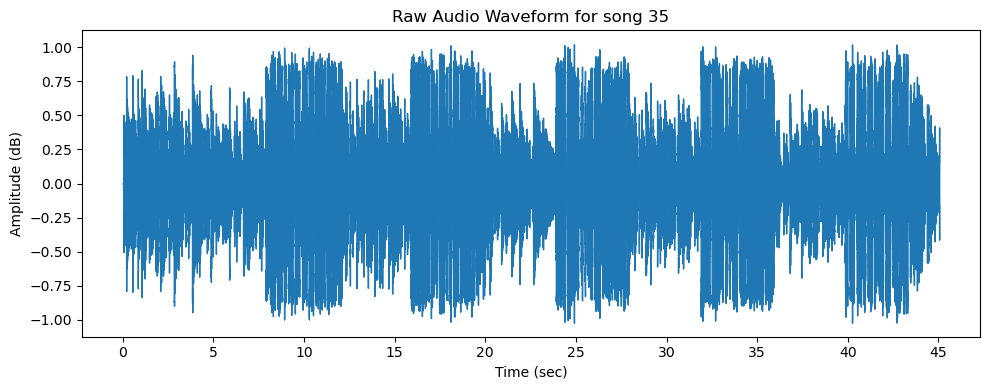

In [5]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y=y, sr=sr)
plt.title(f'Raw Audio Waveform for song {id}')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (dB)')
plt.tight_layout()
plt.show()

In [6]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048, hop_length=512)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

label = annotation_df[annotation_df['song_id'] == id][['valence_mean', 'arousal_mean']].values[0]
print(f"Valence of song {id}: {label[0]}")
print(f"Arousal of song {id}: {label[1]}")

Valence of song 35: 0.5714285714285714
Arousal of song 35: 0.8024691358024691


In [7]:
segment_time = 5
segment_length = segment_time * sr
intervals = [y[i:i+segment_length] for i in range(0, len(y), segment_length)
             if len(y[i:i+segment_length]) == segment_length]

mel_specs = []
for interval in intervals:
    mel_spec = librosa.feature.melspectrogram(y=interval, sr=sr, n_mels=128, n_fft=2048, hop_length=512)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_specs.append(mel_spec_db)

mel_specs = np.array(mel_specs)
print(f"Number of 5-second intervals: {len(mel_specs)}, Shape of each: {mel_specs[0].shape}")

Number of 5-second intervals: 9, Shape of each: (128, 431)


Text(0.5, 1.0, 'Mel Spectrogram for song 35 - First Five Seconds')

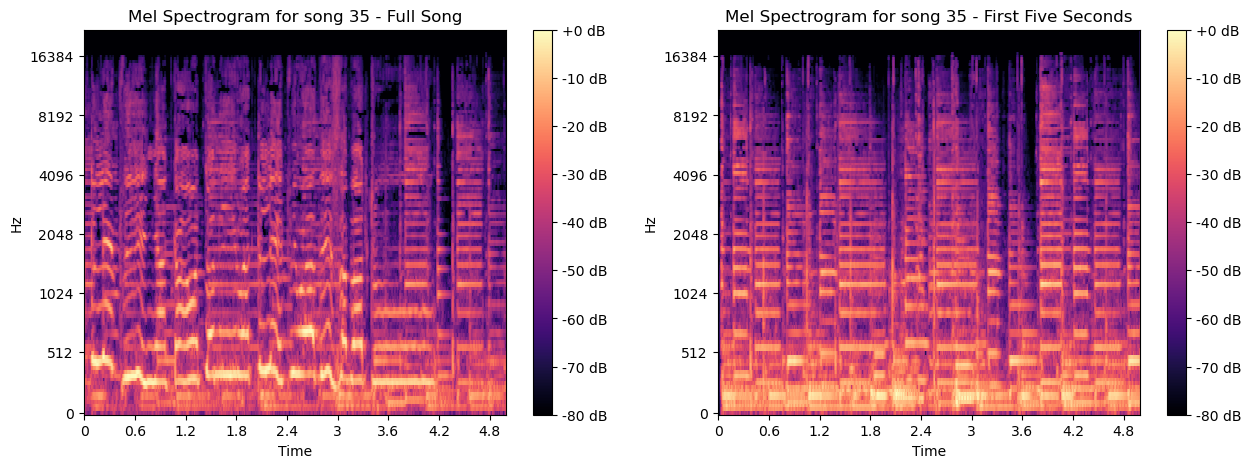

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Mel Spectrogram for song {id} - Full Song")


plt.subplot(1,2,2)
librosa.display.specshow(mel_specs[0], sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Mel Spectrogram for song {id} - First Five Seconds")

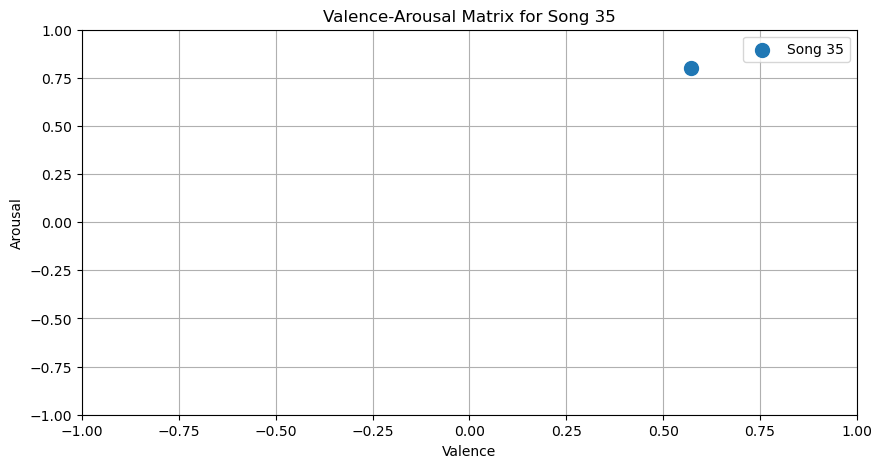

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(label[0], label[1], s=100, label=f"Song {id}")
plt.title(f"Valence-Arousal Matrix for Song {id}")
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()
plt.show()


In [10]:
arousal_df = pd.read_csv("DEAM_Dataset/DEAM_Annotations/annotations/annotations averaged per song/dynamic (per second annotations)/arousal.csv")

row_drop = arousal_df[arousal_df['sample_50000ms'].notna()].index
arousal_df = arousal_df.drop(row_drop)

colDrop = []
for col in arousal_df.columns:
    if col == "song_id":
        continue
    else:
        if int(col.lstrip("sample_").rstrip("ms")) / 1000 > 45 or int(col.lstrip("sample_").rstrip("ms")) / 1000 % 5 != 0:
           colDrop.append(col)

arousal_df = arousal_df.drop(columns=colDrop, axis='columns')


for column in arousal_df.columns:
    if column != "song_id":
        arousal_df[column] = arousal_df[column] / arousal_df[column].abs().max()

arousal_df.head()

,song_id,sample_15000ms,sample_20000ms,sample_25000ms,sample_30000ms,sample_35000ms,sample_40000ms,sample_45000ms
0,2,-0.161336,-0.201125,-0.189941,-0.189987,-0.350107,-0.329782,NaN
1,3,-0.163490,-0.232339,-0.213358,-0.197895,-0.257067,-0.341049,NaN
2,4,0.327916,0.261449,0.227189,0.316772,0.389503,0.397463,NaN
3,5,-0.377010,-0.364075,-0.313468,-0.273180,-0.307263,-0.286042,NaN
4,7,0.684710,0.674163,0.508646,0.413335,0.420563,0.425788,NaN


In [11]:
valence_df = pd.read_csv("DEAM_Dataset/DEAM_Annotations/annotations/annotations averaged per song/dynamic (per second annotations)/valence.csv")

row_drop = valence_df[valence_df['sample_50000ms'].notna()].index
valence_df = valence_df.drop(row_drop)

colDrop = []
for col in valence_df.columns:
    if col == "song_id":
        continue
    else:
        if int(col.lstrip("sample_").rstrip("ms")) / 1000 >= 45 or int(col.lstrip("sample_").rstrip("ms")) / 1000 % 5 != 0:
           colDrop.append(col)

valence_df = valence_df.drop(columns=colDrop, axis='columns')

for column in valence_df.columns:
    if column != "song_id":
        valence_df[column] = valence_df[column] / valence_df[column].abs().max()

valence_df.head()

,song_id,sample_15000ms,sample_20000ms,sample_25000ms,sample_30000ms,sample_35000ms,sample_40000ms
0,2,-0.119447,-0.135950,-0.183874,-0.376130,-0.448772,-0.451459
1,3,-0.308961,-0.338719,-0.377869,-0.458126,-0.456393,-0.430232
2,4,0.251280,0.160389,0.154713,0.207884,0.293078,0.309450
3,5,0.242758,0.244913,0.222530,0.189559,0.191834,0.188632
4,7,0.558332,0.539325,0.541220,0.523711,0.447528,0.497016


In [12]:
valence_df = valence_df[valence_df['song_id'].isin(arousal_df['song_id'])]
arousal_df = arousal_df[arousal_df['song_id'].isin(valence_df['song_id'])]

In [13]:
song_mels = {}
song_labels = {}

for file in audio_files:

    id = int(file.removeprefix("DEAM_Dataset/DEAM_audio/MEMD_audio/").removesuffix(".mp3"))
    
    if id in valence_df['song_id'].values and 40 < librosa.get_duration(path=file) < 46:

        y, sr = librosa.load(file, sr=44100)

        segment_time = 5
        segment_length = segment_time * sr

        # y = 45 seconds
        # y//3 = 15 seconds (first valence and arousal annotations)
        intervals = [y[i:i+segment_length] for i in range(len(y)//3, len(y), segment_length)
                    if len(y[i:i+segment_length]) == segment_length]
        
        mel_specs = []
        label_specs = []
        val = 15000
        for interval in intervals:
            mel_spec = librosa.feature.melspectrogram(y=interval, sr=sr, n_mels=128, n_fft=2048, hop_length=512)
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
            mel_specs.append(mel_spec_db)

            valence = valence_df[valence_df['song_id'] == id][f'sample_{val}ms'].values[0]
            arousal = arousal_df[valence_df['song_id'] == id][f'sample_{val}ms'].values[0]
            label_specs.append([valence, arousal])
            val += 5000
        mel_specs = np.array(mel_specs)
        song_mels[id] = mel_specs
        song_labels[id] = label_specs
